In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
dataset=pd.read_csv("../data/CarPrice.csv")
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3.0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000,21.0,27,13495.0
1,2,3.0,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000,21.0,27,16500.0
2,3,1.0,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000,19.0,26,16500.0
3,4,2.0,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500,24.0,30,13950.0
4,5,2.0,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500,18.0,22,17450.0


In [20]:
dataset.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1.0,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141.0,mpfi,3.78,3.15,9.5,114.0,5400,23.0,28,16845.0
201,202,-1.0,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141.0,mpfi,3.78,3.15,8.7,160.0,5300,19.0,25,19045.0
202,203,-1.0,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173.0,mpfi,3.58,2.87,8.8,134.0,5500,18.0,23,21485.0
203,204,-1.0,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145.0,idi,3.01,3.40,23.0,106.0,4800,26.0,27,22470.0
204,205,-1.0,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141.0,mpfi,3.78,3.15,9.5,114.0,5400,19.0,25,22625.0


In [21]:
dataset.isnull().sum()

car_ID              0
symboling           1
CarName             1
fueltype            1
aspiration          2
doornumber          2
carbody             1
drivewheel          1
enginelocation      1
wheelbase           1
carlength           1
carwidth            1
carheight           3
curbweight          0
enginetype          1
cylindernumber      0
enginesize          1
fuelsystem          2
boreratio           3
stroke              0
compressionratio    3
horsepower          2
peakrpm             0
citympg             1
highwaympg          0
price               0
dtype: int64

In [22]:
data = dataset.dropna()
data=data.drop('car_ID', axis=1)
data=data.drop('boreratio',axis=1,)
data=data.drop('enginesize', axis=1)
data=data.drop('curbweight', axis=1)
data=data.drop('citympg', axis=1)
data=data.drop('highwaympg', axis=1)
               


In [23]:
from sklearn.preprocessing import LabelEncoder

def labelencoder(df):                                     #It convert the catorigcal and string data into numerical values to 
    for c in df.columns:                                        #interperate easily.
        if df[c].dtype=='object': 
            df[c] = df[c].fillna('N')
            lbl = LabelEncoder()
            lbl.fit(list(df[c].values))
            df[c] = lbl.transform(df[c].values)
    return df

In [24]:
data1=labelencoder(data)                            #calling function of labelencoder
data1                                             #Visualization of data after performing labelencoder  technique

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,enginetype,cylindernumber,fuelsystem,stroke,compressionratio,horsepower,peakrpm,price
0,3.0,2,1,0,1,0,2,0,88.6,168.8,64.1,48.8,0,2,5,2.68,9.0,111.0,5000,13495.0
1,3.0,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,0,2,5,2.68,9.0,111.0,5000,16500.0
2,1.0,1,1,0,1,2,2,0,94.5,171.2,65.5,52.4,5,3,5,3.47,9.0,154.0,5000,16500.0
3,2.0,4,1,0,0,3,1,0,99.8,176.6,66.2,54.3,3,2,5,3.40,10.0,102.0,5500,13950.0
4,2.0,5,1,0,0,3,0,0,99.4,176.6,66.4,54.3,3,1,5,3.40,8.0,115.0,5500,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.0,125,1,0,0,3,2,0,109.1,188.8,68.9,55.5,3,2,5,3.15,9.5,114.0,5400,16845.0
201,-1.0,124,1,1,0,3,2,0,109.1,188.8,68.8,55.5,3,2,5,3.15,8.7,160.0,5300,19045.0
202,-1.0,126,1,0,0,3,2,0,109.1,188.8,68.9,55.5,5,3,5,2.87,8.8,134.0,5500,21485.0
203,-1.0,128,0,1,0,3,2,0,109.1,188.8,68.9,55.5,3,3,3,3.40,23.0,106.0,4800,22470.0


In [25]:
data.info()
data.describe()      # As we can see below that there are 4 5 columns that do not have 506 values, 
                         #which means they have some null values in them

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 0 to 204
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         186 non-null    float64
 1   CarName           186 non-null    int64  
 2   fueltype          186 non-null    int64  
 3   aspiration        186 non-null    int64  
 4   doornumber        186 non-null    int64  
 5   carbody           186 non-null    int64  
 6   drivewheel        186 non-null    int64  
 7   enginelocation    186 non-null    int64  
 8   wheelbase         186 non-null    float64
 9   carlength         186 non-null    float64
 10  carwidth          186 non-null    float64
 11  carheight         186 non-null    float64
 12  enginetype        186 non-null    int64  
 13  cylindernumber    186 non-null    int64  
 14  fuelsystem        186 non-null    int64  
 15  stroke            186 non-null    float64
 16  compressionratio  186 non-null    float64
 1

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,enginetype,cylindernumber,fuelsystem,stroke,compressionratio,horsepower,peakrpm,price
count,186.000000,186.000000,186.000000,186.000000,186.00000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,0.817204,71.155914,0.913978,0.182796,0.44086,2.591398,1.317204,0.016129,98.621505,173.656452,65.853763,53.660215,3.005376,2.086022,3.268817,3.246935,9.976452,104.736559,5134.408602,13182.554661
std,1.260169,37.365288,0.281153,0.387542,0.49783,0.847719,0.551582,0.126312,6.044266,12.381721,2.123335,2.425969,1.037134,0.707579,2.027592,0.325034,3.758630,40.187809,471.712149,8002.897616
min,-2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,47.800000,0.000000,0.000000,0.000000,2.070000,7.000000,48.000000,4150.000000,5118.000000
25%,0.000000,40.250000,1.000000,0.000000,0.00000,2.000000,1.000000,0.000000,94.500000,166.300000,64.025000,52.000000,3.000000,2.000000,1.000000,3.102500,8.500000,70.000000,4800.000000,7747.250000
50%,1.000000,75.000000,1.000000,0.000000,0.00000,3.000000,1.000000,0.000000,96.750000,173.200000,65.400000,54.000000,3.000000,2.000000,5.000000,3.270000,9.000000,95.000000,5200.000000,10096.500000
75%,2.000000,105.750000,1.000000,0.000000,1.00000,3.000000,2.000000,0.000000,101.800000,181.650000,66.575000,55.500000,3.000000,2.000000,5.000000,3.410000,9.400000,116.000000,5500.000000,16502.250000
max,3.000000,132.000000,1.000000,1.000000,1.00000,4.000000,2.000000,1.000000,120.900000,208.100000,72.300000,59.800000,6.000000,6.000000,6.000000,4.170000,23.000000,288.000000,6600.000000,45400.000000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='CarName', ylabel='price'>

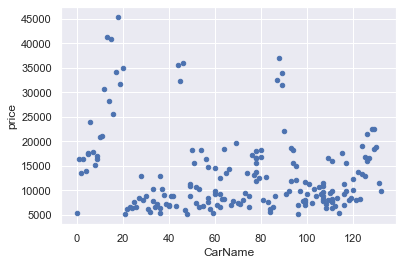

In [26]:
data.plot.scatter('CarName', 'price')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='carlength', ylabel='price'>

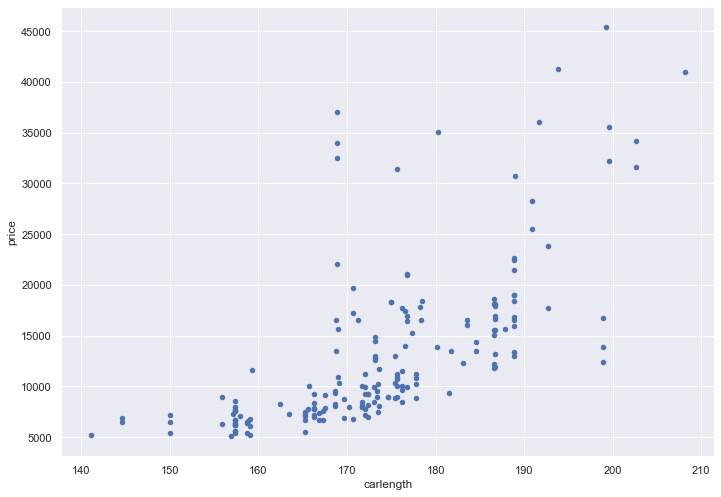

In [28]:
data.plot.scatter('carlength', 'price')

<AxesSubplot:>

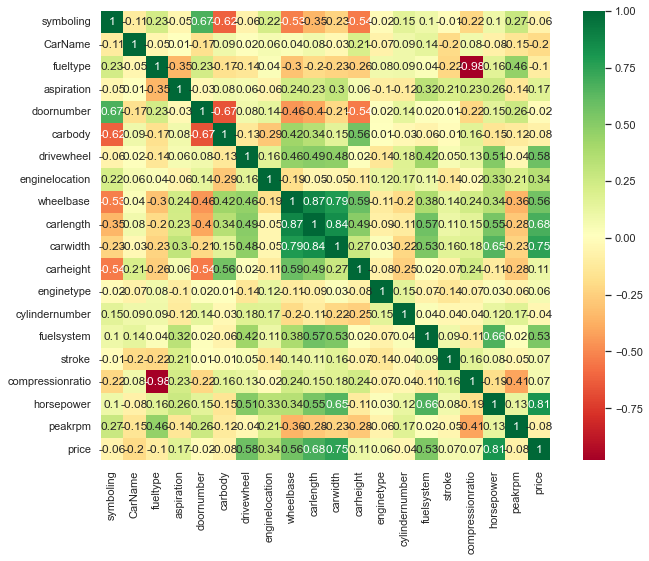

In [11]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data.corr().round(2), square=True, cmap='RdYlGn', annot=True)

In [12]:
Labels=data['price']                        # It take salary column as a targeted label.
data=data.drop('price',axis=1)  

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
from sklearn.preprocessing import MinMaxScaler

#Final_selected =  (Final_selected - Final_selected.mean()) / Final_selected.std()
scaler = MinMaxScaler(feature_range=(0, 1))                        #It normalized the whole dataset between 0 and 1.
Final_selected = scaler.fit_transform(data)

In [15]:
X_train, X_test,y_train, y_test = train_test_split(data,Labels, test_size=0.20,random_state=9)

In [16]:
print('training features =',X_train.shape)
print('testing features   =',y_train.shape)
print('training labels=',X_test.shape)
print('testing labels =',y_test.shape)

training features = (148, 19)
testing features   = (148,)
training labels= (38, 19)
testing labels = (38,)


# Linear regression model

In [56]:
#creating a model
from sklearn.linear_model import LinearRegression
# creating a object
LR_Model = LinearRegression()
LR_Model.fit(X_train, y_train)
pred = LR_Model.predict(X_test)

In [57]:
# mse = mean_squared_error(y_test, pred)
# print('auracy', r2_score(y_test, pred)*100)

MAE: 2383.373871146206
MSE: 9500028.240812236
RMSE: 3082.2115827457783


e:\pythonenvironment\scl\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


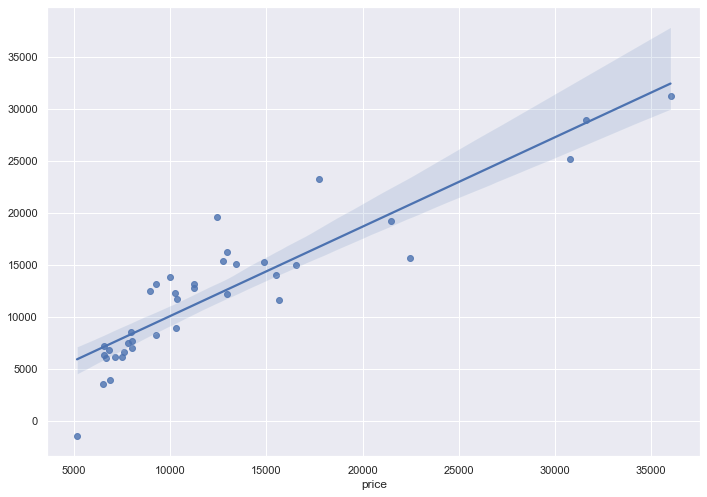

In [58]:
sns.regplot(y_test,pred, data=data1);
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

In [113]:
new_input = [[-1,88,1,8,9,4,2,1,105.1,120.1,168.7,67.8,54.5,9,3,5.15,13.9,106,2000]] 
predictions = model.predict(new_input)
print(predictions)


[67921.22940899]


e:\pythonenvironment\scl\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Random Fores

In [114]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rfc = RandomForestRegressor()
rfc.fit(X_train,y_train)
pred = rfc.predict(X_test)
# print('Random Forest accuracy is',r2_score(y_test,pred)*100)

MAE: 1353.2339913157891
MSE: 3333066.3635918326
RMSE: 1825.668744211784


e:\pythonenvironment\scl\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


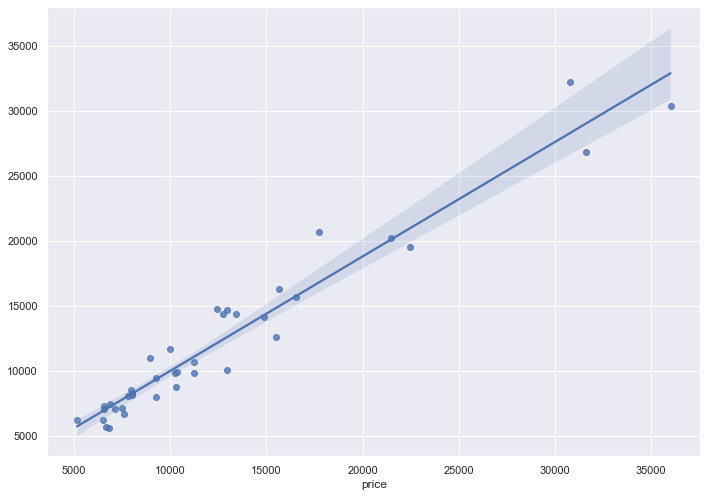

In [115]:
sns.regplot(y_test,pred, data=data1);
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


In [116]:
res = pd.DataFrame()
res['Y_Test'] = y_test
res['PRED'] = pred
res.head()

,Y_Test,PRED
83,14869.0,14103.43167
23,7957.0,8503.68000
30,6479.0,6175.61500
159,7788.0,8070.43000
33,6529.0,7012.10500


In [117]:
new_input = [[-3,120,1,8,4,4,2,1,111.1,130.1,168.7,73.8,54.5,9,3,5.15,11.9,106,6420]] 
predictions = model.predict(new_input)
print(predictions)

[66045.26147733]


e:\pythonenvironment\scl\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Model SVR

In [118]:
#SVR Model
#r2_score regression score function
import seaborn as sns
from sklearn.svm import SVR
SVR_model=SVR(kernel ='linear')
SVR_model.fit(X_train,y_train)
pred=SVR_model.predict(X_test)

In [119]:
#model performance
from sklearn.metrics import r2_score

MAE: 2182.4573448264587
MSE: 8972022.399339736
RMSE: 2995.333437088388


e:\pythonenvironment\scl\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


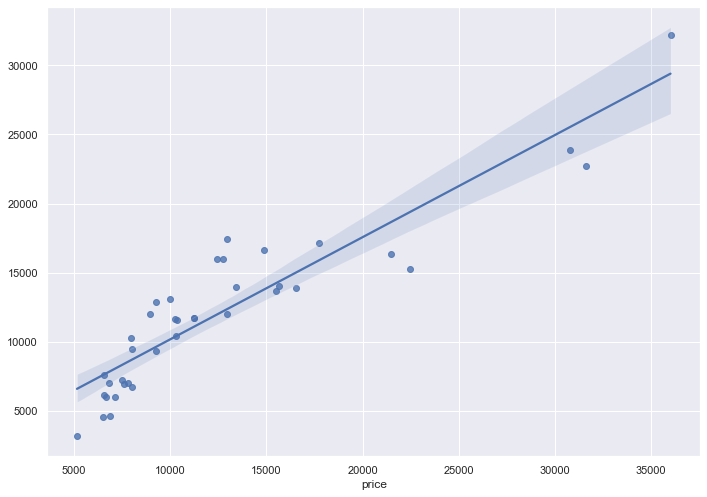

In [120]:
# print('Support vector regression accuracy is',r2_score(y_test,pred)*100)
sns.regplot(y_test,pred, data=data1);
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

In [121]:
res = pd.DataFrame()
res['y_test'] = y_test
res['pred'] = pred
res.head()

,y_test,pred
83,14869.0,16668.010937
23,7957.0,10293.825082
30,6479.0,4507.092335
159,7788.0,7026.654232
33,6529.0,6138.786597


In [122]:
new_input = [[3,10,1,3,6,2,4,0,81.1,140.1,135.7,73.8,54.5,9,1,5.15,11.9,77,4520]] 
predictions = model.predict(new_input)
print(predictions)

[43798.3130687]


e:\pythonenvironment\scl\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# KNN Regressor

In [123]:
from sklearn.neighbors import KNeighborsRegressor

In [124]:
knn=KNeighborsRegressor(n_neighbors=int(4))
model_knn=knn.fit(X_train,y_train)
y_knn_pred=model_knn.predict(X_test)   
mse=mean_squared_error(y_test,y_knn_pred)

NameError: name 'mean_squared_error' is not defined

MAE: 2182.4573448264587
MSE: 8972022.399339736
RMSE: 2995.333437088388


e:\pythonenvironment\scl\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


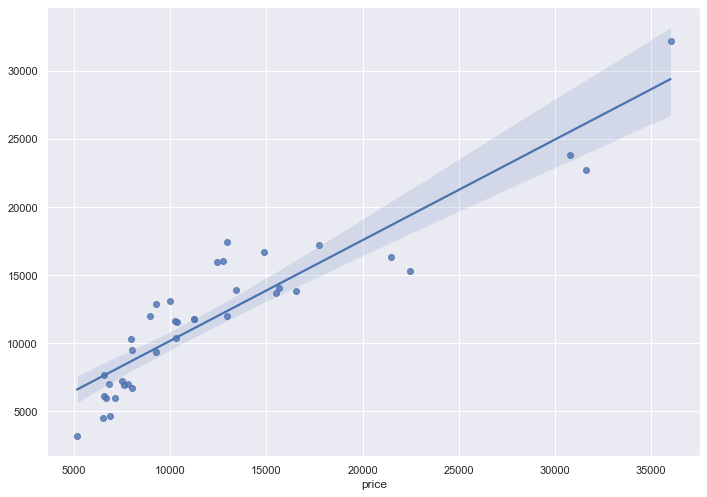

In [125]:
sns.regplot(y_test,pred, data=data1);
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

# DecisionTreeRegressor

In [126]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth = 10,random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=0)

MAE: 2182.4573448264587
MSE: 8972022.399339736
RMSE: 2995.333437088388


e:\pythonenvironment\scl\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


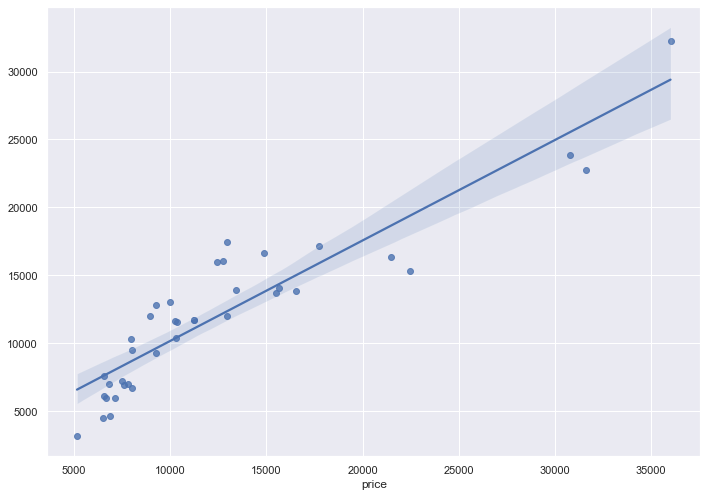

In [127]:
y_pred = regressor.predict(X_test)
sns.regplot(y_test,pred);
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

In [130]:
new_input = [[0,3,4,3,2,5,1,3,77.1,132.1,122.7,66.8,35.5,9,1,5.15,11.9,77,2200]] 
predictions = model.predict(new_input)
print(predictions)

[60345.53166737]


e:\pythonenvironment\scl\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# RFE

In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
lr = LinearRegression(normalize=True)
lr.fit(data,Labels)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=15 )
rfe.fit(data,Labels)
print(rfe.support_)
print(rfe.ranking_)


[ True False  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False]
[1 4 1 1 1 1 1 1 1 3 1 2 1 1 1 1 1 1 5]


e:\pythonenvironment\scl\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
e:\pythonenvironment\scl\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

# SelectKBest method

In [149]:
# example of correlation feature selection for numerical data
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
 
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k=7)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    print(type(X_train_fs))
    # transform test input data
    X_test_fs = fs.transform(X_test)
    #print(X_test_fs)
    return X_train_fs, X_test_fs, fs
 

<class 'numpy.ndarray'>
Feature 0: 0.010848
Feature 1: 9.182230
Feature 2: 0.794918
Feature 3: 3.465740
Feature 4: 0.012989
Feature 5: 3.076957
Feature 6: 69.234878
Feature 7: 23.663884
Feature 8: 57.842905
Feature 9: 118.315861
Feature 10: 186.652257
Feature 11: 1.465161
Feature 12: 0.078702
Feature 13: 3.806671
Feature 14: 62.085287
Feature 15: 1.364240
Feature 16: 0.113320
Feature 17: 275.016190
Feature 18: 0.678358


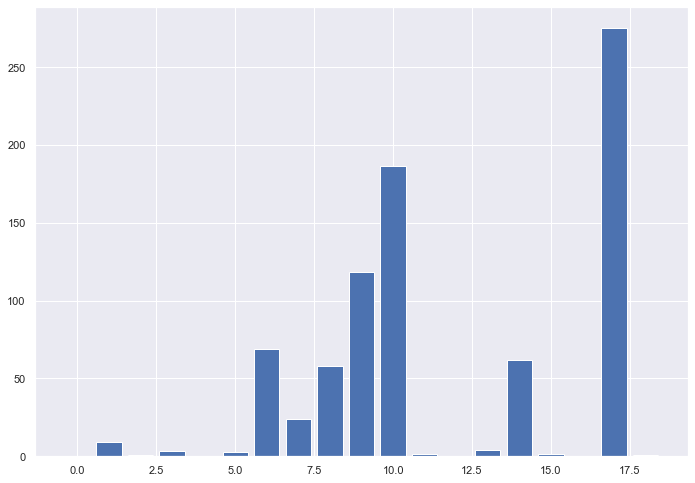

In [150]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()